In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_ad = pd.read_csv("application_data.csv")
df_ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Data over view with panda head function.

In [3]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Data set has 307511 rows and 122 columns

## Data Cleaning

### Get the percentage of null values

In [4]:
total_null_values = df_ad.isnull().sum().sort_values(ascending = True)
total_percentage = 100*(df_ad.isnull().sum()/df_ad.isnull().count()).sort_values(ascending = True)
missing_values = pd.concat([total_null_values,total_percentage], axis = 1, keys = ['total','percentage'])
missing_values

,total,percentage
SK_ID_CURR,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_CITY_NOT_LIVE_CITY,0,0.000000
...,...,...
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297


#### Detect those columns those have null value more than 10%

In [5]:
drop_columns = total_percentage[total_percentage>10].keys()
drop_columns

Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'EXT_SOURCE_3', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE',
       'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'HOUSETYPE_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'ENTRANCES_AVG',
       'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'WALLSMATERIAL_MODE', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1',
       'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI',
       'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE', 'OWN_CAR_AGE',
       'YEARS_BUILD_MODE', 'YEARS_B

In [6]:
drop_columns.shape

(57,)

#### Total 57 columns have more than 10% null values

### Drop the columns 

In [7]:
df_ad1 = df_ad.drop(columns = drop_columns)
df_ad1.shape

(307511, 65)

#### After droping columns data frame has 65 columns remaining


In [8]:
df_ad1.isnull().sum().sort_values(ascending = False)

NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
                               ... 
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
TARGET                            0
FLAG_DOCUMENT_21                  0
Length: 65, dtype: int64

#### There are more than 1000 rows remaning with null values

In [9]:
df_ad2 = df_ad1.dropna()
df_ad2.shape

(304531, 65)

#### Now data set has 304531 rows and 65 columns

In [23]:
df_ad2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304531 non-null  int64  
 1   TARGET                       304531 non-null  int64  
 2   NAME_CONTRACT_TYPE           304531 non-null  object 
 3   CODE_GENDER                  304531 non-null  object 
 4   FLAG_OWN_CAR                 304531 non-null  object 
 5   FLAG_OWN_REALTY              304531 non-null  object 
 6   CNT_CHILDREN                 304531 non-null  int64  
 7   AMT_INCOME_TOTAL             304531 non-null  float64
 8   AMT_CREDIT                   304531 non-null  float64
 9   AMT_ANNUITY                  304531 non-null  float64
 10  AMT_GOODS_PRICE              304531 non-null  float64
 11  NAME_TYPE_SUITE              304531 non-null  object 
 12  NAME_INCOME_TYPE             304531 non-null  object 
 13 

### Data Analysis

In [10]:
df_ad2.AMT_ANNUITY.describe()

count    304531.000000
mean      27146.369655
std       14480.104699
min        1615.500000
25%       16573.500000
50%       24939.000000
75%       34641.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

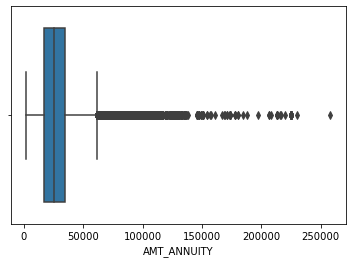

In [11]:
sns.boxplot(df_ad2['AMT_ANNUITY'])
plt.show()

#### AMT_ANNUITY column has high outliers

In [12]:
df_ad2.AMT_CREDIT.describe()

count    3.045310e+05
mean     5.995592e+05
std      4.021453e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.172660e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

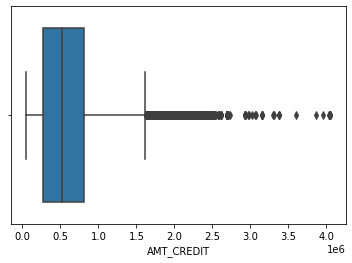

In [13]:
sns.boxplot(df_ad2['AMT_CREDIT'])
plt.show()

#### AMT_CREDIT has high value outliers

In [14]:
df_ad2.AMT_INCOME_TOTAL.describe()

count    3.045310e+05
mean     1.686634e+05
std      2.378910e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.476000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

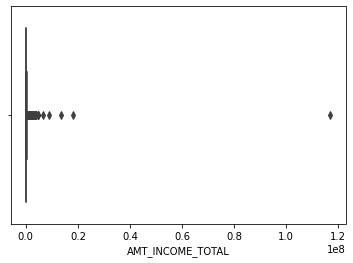

In [15]:
sns.boxplot(df_ad2['AMT_INCOME_TOTAL'])
plt.show()

#### AMT_INCOME_TOTAL column has an extreme value outlier

In [16]:
df_ad2.AMT_GOODS_PRICE.describe()

count    3.045310e+05
mean     5.384949e+05
std      3.690524e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

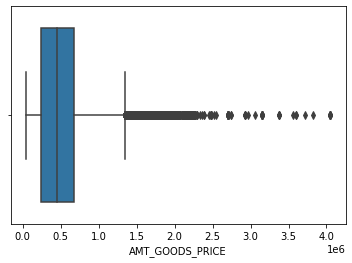

In [17]:
sns.boxplot(df_ad2['AMT_GOODS_PRICE'])
plt.show()

#### AMT_GOODS_PRICE column has multiple number of outliers

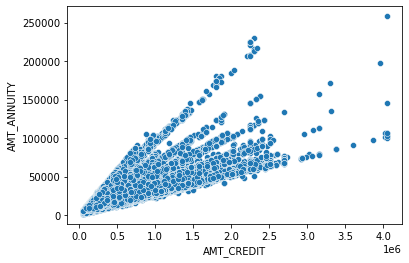

In [18]:
sns.scatterplot(data = df_ad2, x='AMT_CREDIT', y='AMT_ANNUITY')
plt.show()

##### AMT_CREDIT  and AMT_ANNUITY columns are co-related with each other with positive corelation

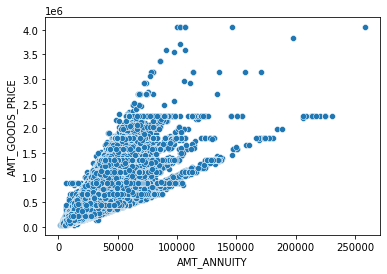

In [19]:
sns.scatterplot(data = df_ad2, x='AMT_ANNUITY', y='AMT_GOODS_PRICE')
plt.show()

##### AMT_ANNUITY and  AMT_GOODS_PRICE columns are corelated with each other upto a certain value

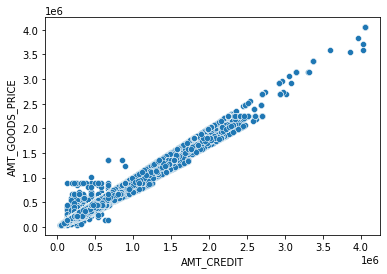

In [20]:
sns.scatterplot(data = df_ad2, x='AMT_CREDIT', y='AMT_GOODS_PRICE')
plt.show()

##### AMT_CREDIT and AMT_GOODS_PRICE are highly co-related with each other with positive corelation

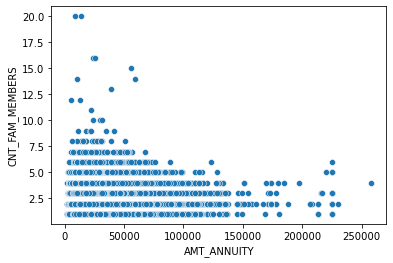

In [35]:
sns.scatterplot(data = df_ad2, x='AMT_ANNUITY', y='CNT_FAM_MEMBERS')
plt.show()

##### AMT_ANNUITY and CNT_FAM_MEMBERS columns are almost negitively corelated with each other

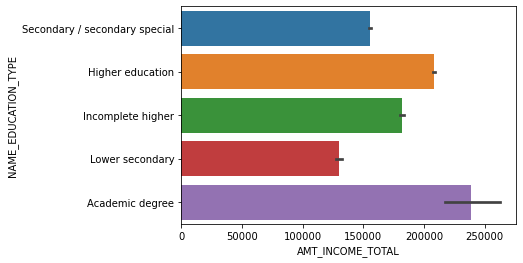

In [21]:
sns.barplot(data = df_ad2, x='AMT_INCOME_TOTAL', y='NAME_EDUCATION_TYPE')
plt.show()

##### Academic degree holders income total is the highest

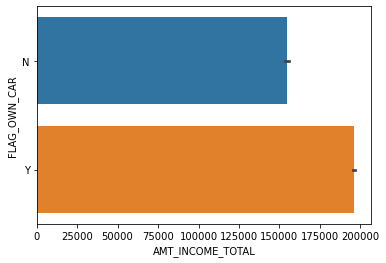

In [24]:
sns.barplot(data = df_ad2, x='AMT_INCOME_TOTAL', y='FLAG_OWN_CAR')
plt.show()

##### Majority of the car holder clients income is almost 200000

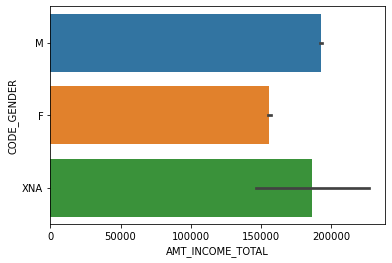

In [25]:
sns.barplot(data = df_ad2, x='AMT_INCOME_TOTAL', y='CODE_GENDER')
plt.show()

##### Male clients has the income total majority

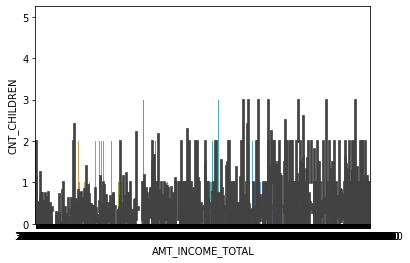

In [28]:
sns.barplot(data = df_ad2, x='AMT_INCOME_TOTAL', y='CNT_CHILDREN')
plt.show()

##### Majority Clients has singel child or none

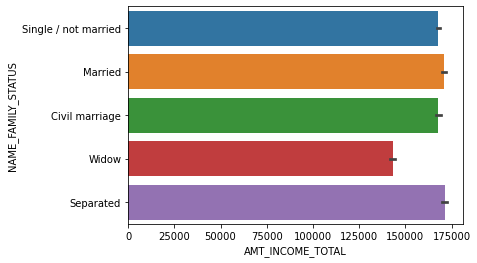

In [29]:
sns.barplot(data = df_ad2, x='AMT_INCOME_TOTAL', y='NAME_FAMILY_STATUS')
plt.show()

##### Separated and Married clients have the total income majority

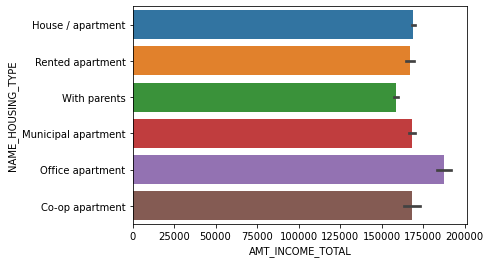

In [30]:
sns.barplot(data = df_ad2, x='AMT_INCOME_TOTAL', y='NAME_HOUSING_TYPE')
plt.show()

##### Highest income client has office apartment 

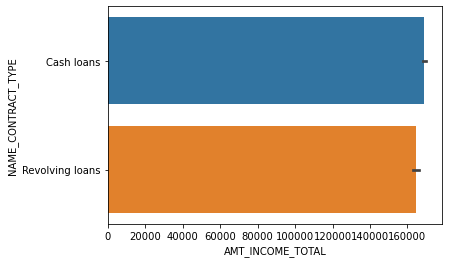

In [31]:
sns.barplot(data = df_ad2, x='AMT_INCOME_TOTAL', y='NAME_CONTRACT_TYPE')
plt.show()

##### Cash loans is the best option according to the income amount

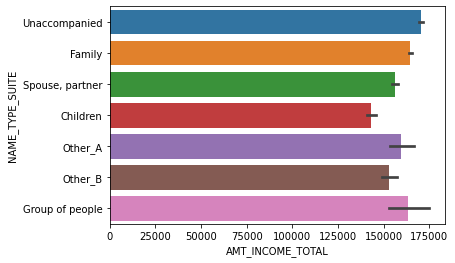

In [32]:
sns.barplot(data = df_ad2, x='AMT_INCOME_TOTAL', y='NAME_TYPE_SUITE')
plt.show()

##### Majority of clients are unaccompanied during loan process

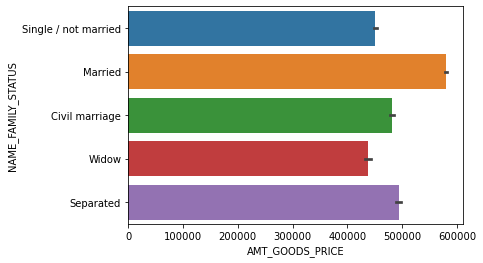

In [34]:
sns.barplot(data = df_ad2, x='AMT_GOODS_PRICE', y='NAME_FAMILY_STATUS')
plt.show()

##### Married clients has the highest good price from others

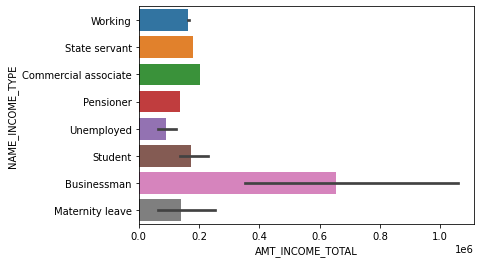

In [36]:
sns.barplot(data = df_ad2, x='AMT_INCOME_TOTAL', y='NAME_INCOME_TYPE')
plt.show()

##### Business is the best source of income the other occupation

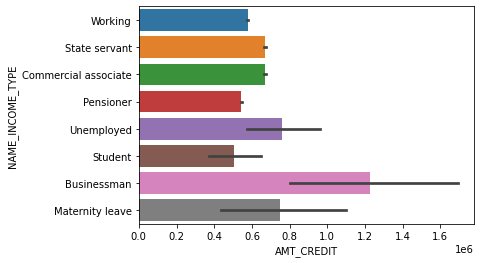

In [50]:
sns.barplot(data = df_ad2, x='AMT_CREDIT', y='NAME_INCOME_TYPE')
plt.show()

##### Business type income source has the highest loan amout credit

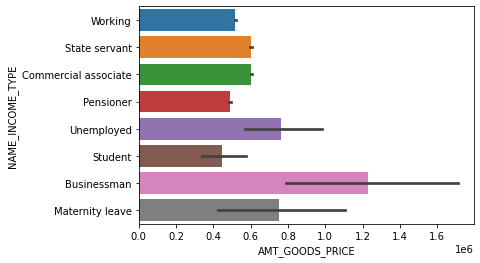

In [51]:
sns.barplot(data = df_ad2, x='AMT_GOODS_PRICE', y='NAME_INCOME_TYPE')
plt.show()

##### Business income source has the highest good price 

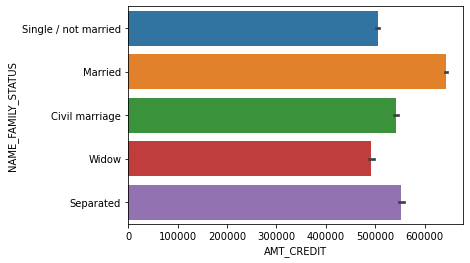

In [52]:
sns.barplot(data = df_ad2, x='AMT_CREDIT', y='NAME_FAMILY_STATUS')
plt.show()

##### Married clients has the highest amount of loan credit

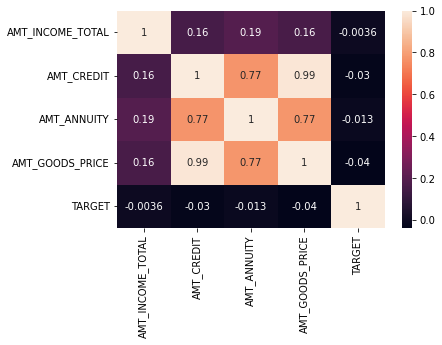

In [49]:
sns.heatmap(df_ad2[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']].corr(),annot = True)
plt.show()

##### credit amount and good price are highly corelated with each other 